# **Inference and Predictive modelling for the Happiness Score using Shallow and Deep Learning models**

### Mounting the drive

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


## Loading the libraries

In [2]:
#Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the data

Loading **2015** Data


In [3]:
#Loading 2015 Data
df1 = pd.read_csv(r"/gdrive/Shared drives/Big Data Project/Data/2015.csv")
df1 = df1.iloc[:,[0,3,5,6,7,8,9,10]]
rename_dictionary = ["Country","Score","Economy","Family","Health","Freedom","Trust","Generosity"]
df1.columns = rename_dictionary
df1.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Loading **2016** data

In [4]:
#Loading 2016 Data
df2 = pd.read_csv(r"/gdrive/Shared drives/Big Data Project/Data/2016.csv")
df2 = df2.iloc[:,[0,3,6,7,8,9,10,11]]
df2.columns = rename_dictionary
df2.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


Loading the **2017** data

In [5]:
#Loading the 2017 data
df3 = pd.read_csv(r"/gdrive/Shared drives/Big Data Project/Data/2017.csv")
df3 = df3.iloc[:,[0,2,5,6,7,8,10,9]]
df3.columns = rename_dictionary
df3.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


Loading the **2018** data

In [6]:
#Loading the 2018 data
df4 = pd.read_csv(r"/gdrive/Shared drives/Big Data Project/Data/2018.csv")
df4 = df4.iloc[:,[1,2,3,4,5,6,8,7]]
df4.columns = rename_dictionary
df4.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


Loading the 2019 data

In [7]:
#loading the 2019 data
df5 = pd.read_csv(r"/gdrive/Shared drives/Big Data Project/Data/2019.csv")
df5 = df5.iloc[:,[1,2,3,4,5,6,8,7]]
df5.columns = rename_dictionary
df5.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


Combining all the rows

In [8]:
#Combining the years into one
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Country,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df.isna().sum()

#replacing the null in Trust column with the average Trust
df["Trust"].fillna(0.411,inplace = True)
df.isnull().any()

Country       False
Score         False
Economy       False
Family        False
Health        False
Freedom       False
Trust         False
Generosity    False
dtype: bool

# **Inference Modelling**

### Linear Regression

Let us first try to interpret the coefficients and how they effect the Happiness Index.

In [17]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:,2:].values
y=df.iloc[:,1].values
linearmodel = LinearRegression()
linearmodel.fit(X,y)
#To retrieve the intercept:
print(linearmodel.intercept_)
#For retrieving the slope:
print(linearmodel.coef_)
coefficients = list(linearmodel.coef_)

2.176156508661899
[1.13958779 0.64450235 1.00934031 1.47859991 0.86345112 0.59165257]


In [18]:
print("Holding everything else constant,")
for i in range(len(coefficients)):
    print("For a unit change in " + str(rename_dictionary[i+2]) + " the happiness score increases by: " + str(coefficients[i]))

Holding everything else constant,
For a unit change in Economy the happiness score increases by: 1.1395877901894254
For a unit change in Family the happiness score increases by: 0.6445023525318105
For a unit change in Health the happiness score increases by: 1.0093403136903152
For a unit change in Freedom the happiness score increases by: 1.478599909931456
For a unit change in Trust the happiness score increases by: 0.8634511188181082
For a unit change in Generosity the happiness score increases by: 0.5916525703015001


From the above results, we can see that the "Freedom" factor is the most important factor to effect the Happiness Score.


# **Predictive Modelling**


Now, let's try to use some different algorithms to predict the score based on different factors.

In [0]:
#Train Test Split
from sklearn.model_selection import train_test_split 
from sklearn import metrics
X = df.iloc[:,2:].values
y=df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### Regression Trees

One of the most simplest and easy to interpret model is Regression Trees. Let's try different number of maximum leaf nodes for each tree and look at the best possible accuracy.

In [23]:
#Regression Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
leaf_nodes = [5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30]
regressor = DecisionTreeRegressor()
MSE_decisiontrees = []
for n in leaf_nodes:
    regressor.set_params(max_leaf_nodes = n)
    regressor.fit(X_train, y_train)
    MSE_decisiontrees.append(mean_squared_error(y_test,regressor.predict(X_test)))

print(min(MSE_decisiontrees))
print("leaf_nodes: " + str(leaf_nodes[MSE_decisiontrees.index(min(MSE_decisiontrees))]))

0.37037858523069267
leaf_nodes: 28


Text(0.5, 1.0, 'Regression Trees')

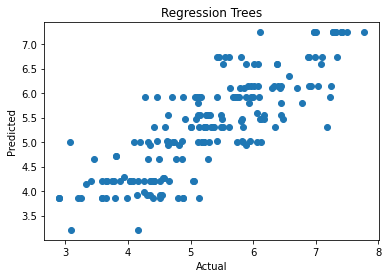

In [24]:
#Scatter plot of actual vs predicted values
plt.scatter(x = y_test, y = regressor.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Trees')

The most common metric for accuracy of continous variables is the "Root Mean Squared Error". The best possible RMSE in the different regression trees that we found out was 0.3703 at 28 maximum leaf nodes.

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
#plotting the best tree
clf = DecisionTreeRegressor(max_leaf_nodes = 28)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, feature_names = ["Economy","Family","Health","Freedom","Trust","Generosity"],out_file='tree.dot') 

![alt text](https://drive.google.com/uc?id=1m8y1fFIv_AEX9SOdjDpT3N7H9h3FC9Ps)

### Lasso and Ridge Regression


When we use Linear Regression for prediction, it is often very overfit to the data i.e. for a very small change in the training data, we see a considerably big change in the regression output. To encounter this problem some kind of penalty must be induced. This is where Lasso and Ridge regression come into play. These models make sure that the model is not overfit and thus help in making a better predictive model.

Let's try a range of values for the alpha for both Lasso and Ridge regression and find the best possible RMSE.

In [25]:
#Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
MSE_lasso = []

for a in parameters:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    MSE_lasso.append(mean_squared_error(y_test,lasso.predict(X_test)))

print(min(MSE_lasso))
print("alpha: " + str(parameters[MSE_lasso.index(min(MSE_lasso))]))

0.31337499447089145
alpha: 0.01


Text(0.5, 1.0, 'Lasso Penalized')

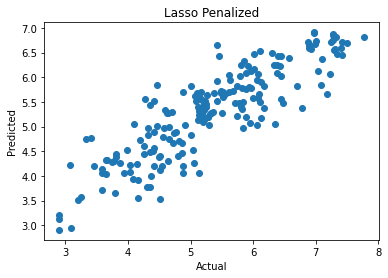

In [33]:
lasso.set_params(alpha = 0.01)
lasso.fit(X_train, y_train)
#Scatter plot of actual vs predicted values
plt.scatter(x = y_test, y = lasso.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Penalized')

In [30]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
MSE_ridge = []

for a in parameters:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    MSE_ridge.append(mean_squared_error(y_test,ridge.predict(X_test)))

print(min(MSE_ridge))
print("alpha: " + str(parameters[MSE_ridge.index(min(MSE_ridge))]))

0.3166900272196123
alpha: 5


Text(0.5, 1.0, 'Ridge Penalized')

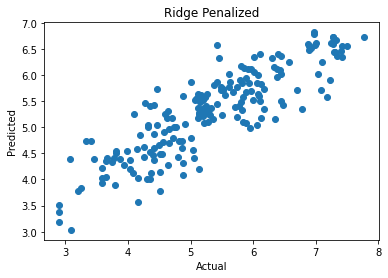

In [31]:
#Scatter plot of actual vs predicted values
plt.scatter(x = y_test, y = ridge.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Penalized')

As we can see, the Lasso model has the best RMSE of 0.31337. 

### Deep Neural Net

In [0]:
#Doing the Deep Neural Net
from tensorflow import keras

In [17]:
#let's initiliaze a model with 10 dene layers, the output layer has to be with a linear activation 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape = [6]))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 2.1959
Epoch 2/100
19/19 [==============================] - 0s 983us/step - loss: 0.4961
Epoch 3/100
19/19 [==============================] - 0s 978us/step - loss: 0.4719
Epoch 4/100
19/19 [==============================] - 0s 969us/step - loss: 0.4197
Epoch 5/100
19/19 [==============================] - 0s 970us/step - loss: 0.3943
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3674
Epoch 7/100
19/19 [==============================] - 0s 972us/step - loss: 0.3578
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3586
Epoch 9/100
19/19 [==============================] - 0s 957us/step - loss: 0.3413
Epoch 10/100
19/19 [==============================] - 0s 978us/step - loss: 0.3308
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3248
Epoch 12/100
19/19 [==============================] - 0s 955us/step - loss: 0.3241
Epoch 13/100
19/19 [=

Text(0.5, 1.0, 'Deep Learning')

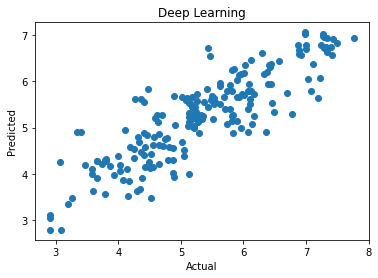

In [19]:
#Scatter plot of actual vs predicted values
plt.scatter(x = y_test, y = model.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Deep Learning')

### Random Forest

In [11]:
#Importing the Emsemble method
from sklearn.ensemble import RandomForestRegressor
regMod = RandomForestRegressor(max_depth=3, random_state=10)
regMod.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [16]:
#Let's look at the feature importance
for feature, importance in zip(df.columns[2:], regMod.feature_importances_):
  print('The feature importance of ' + str(feature) + ' is ' + str(importance))

The feature importance of Economy is 0.4761396972273258
The feature importance of Family is 0.038917718570730286
The feature importance of Health is 0.374537397787535
The feature importance of Freedom is 0.07973262674129458
The feature importance of Trust is 0.010432875046151577
The feature importance of Generosity is 0.02023968462696275


In [0]:
mse = metrics.mean_squared_error(y_test, regMod.predict(X_test))
print(mse)

0.35206705584154196


Text(0.5, 1.0, 'Random Forest')

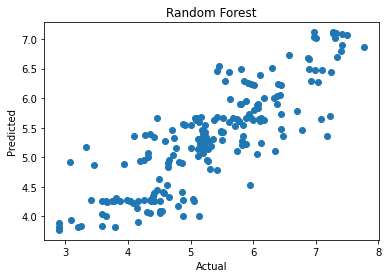

In [21]:
#Scatter plot of actual vs predicted values
plt.scatter(x = y_test, y = regMod.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')